In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [30]:
df = pd.read_csv("data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


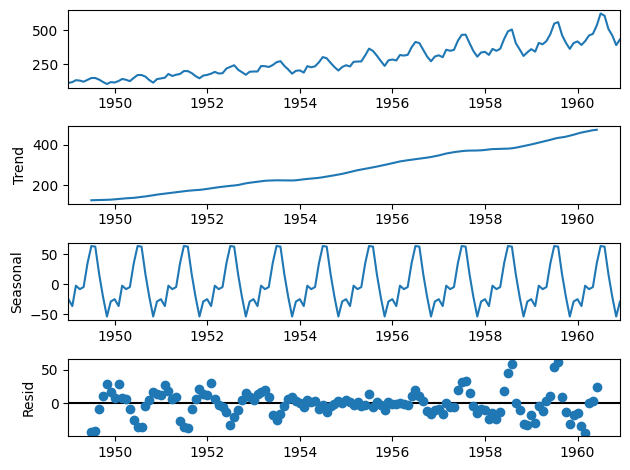

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

In [32]:
def exp_smth(x_t_1, a, s_t_1):
	return a*x_t_1+(1-a)*s_t_1
data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(7)
s[0] = data[0]
for t, x_t in enumerate(data):
	s[t+1] = exp_smth(x_t, a, s[t])
print(s)

[15.      15.      18.5     23.05    27.915   25.8745  26.66235]


In [33]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(data)
alpha = 0.7
model = ses.fit(smoothing_level=alpha,optimized=False)
forecast = model.forecast(1)
print(forecast)

[26.66235]


In [ ]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('data/daily-total-female-births.csv', squeeze=True, header=0, index_col=0)
result = adfuller(df.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


/var/folders/8_/y936460960110gnpk46t3fw00000gn/T/ipykernel_977/3755095242.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('data/daily-total-female-births.csv', squeeze=True, header=0, index_col=0)


In [ ]:
df_diff_1 = df.diff(periods=1).dropna()

test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -12.625178633871338
p-value:  1.5472400091970336e-23
Critical values:  {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
ряд стационарен


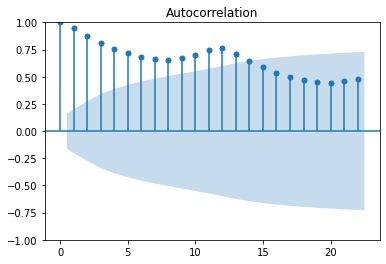

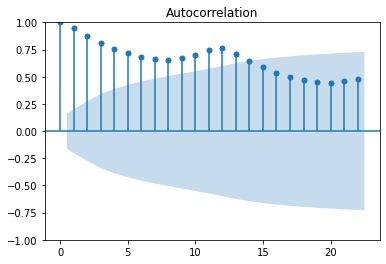

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])
plot_acf(df)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=",")

In [ ]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

In [ ]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Mon, 16 Jan 2023   AIC                          48483.625
Time:                        13:27:45   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

In [ ]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

### MATH&ML-14. Рекомендательные системы. Часть I
#### 4. Метрики в рекомендательных системах

Задание 4.5

In [ ]:
import numpy as np
from sklearn.metrics import dcg_score, ndcg_score

true = np.array([[2, 4, 1, 1, 1]])
relevance = np.array([[2, 5, 2, 3, 1]])

print(round(ndcg_score(true, relevance), 2))

0.97


### MATH&ML-14. Рекомендательные системы. Часть I
#### 5. Проблема холодного старта и popularity-based model

In [ ]:
import pandas as pd
import numpy as np

rating = pd.read_csv('data/rating.csv')
movie = pd.read_csv('data/movie.csv')

In [ ]:
rating.head(2)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16


In [ ]:
movie.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
df = pd.merge(rating, movie, how='left', on='movieId')
df.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


In [ ]:
movie_popularity = df['title'].value_counts()
print(movie_popularity.head().index)

Index(['Pulp Fiction (1994)', 'Forrest Gump (1994)',
       'Shawshank Redemption, The (1994)', 'Silence of the Lambs, The (1991)',
       'Jurassic Park (1993)'],
      dtype='object')


In [ ]:
average_rating_df = df[["title", "rating"]].groupby('title').mean()
sorted_average_ratings = average_rating_df.sort_values(by=["rating",'title'], ascending=False)
print(sorted_average_ratings.head(10))

                                                   rating
title                                                    
Yonkers Joe (2008)                                    5.0
Year Zero: The Silent Death of Cambodia (1979)        5.0
Who Killed Vincent Chin? (1987)                       5.0
When I Walk (2013)                                    5.0
Welcome to Australia (1999)                           5.0
Victor and the Secret of Crocodile Mansion (2012)     5.0
Turkish Dance, Ella Lola (1898)                       5.0
This Thing With Sarah (2013)                          5.0
The great match (2007)                                5.0
The Wrecking Crew (2008)                              5.0


In [ ]:
movie_popularity = df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies.shape[0])

10472


In [ ]:
new_df = df[df['title'].isin(popular_movies)]
best_films = new_df.groupby('title')['rating'].mean().sort_values(ascending=False)
best_films

title
Shawshank Redemption, The (1994)       4.446990
Godfather, The (1972)                  4.364732
Usual Suspects, The (1995)             4.334372
Schindler's List (1993)                4.310175
Godfather: Part II, The (1974)         4.275641
                                         ...   
Barney's Great Adventure (1998)        1.163484
Glitter (2001)                         1.124088
Bratz: The Movie (2007)                1.105556
From Justin to Kelly (2003)            0.973005
SuperBabies: Baby Geniuses 2 (2004)    0.837321
Name: rating, Length: 10472, dtype: float64

### MATH&ML-14. Рекомендательные системы. Часть I
#### 6. Практика

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
articles_data = pd.read_csv('data/shared_articles.csv')
articles_data.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [ ]:
articles_data = articles_data[articles_data['eventType'] == 'CONTENT SHARED']
articles_data.shape[0]

3047

In [ ]:
users_data = pd.read_csv('data/users_interactions.csv')
users_data.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [ ]:
event_type = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 2.5, 
   'FOLLOW': 3.0,
   'COMMENT CREATED': 4.0,  
}

In [ ]:
users_data['event_type'] = users_data['eventType'].map(event_type)

In [ ]:
round(users_data['event_type'].mean(),2)

1.24

In [ ]:
users_df = users_data.groupby(['personId', 'contentId']).first().reset_index().groupby('personId').size()
users_5_df = users_df[users_df >= 5].reset_index()[['personId']]
print(len(users_5_df))

1140


In [ ]:
users_5_df

,personId
0,-9223121837663643404
1,-9212075797126931087
2,-9207251133131336884
3,-9199575329909162940
4,-9196668942822132778
...,...
1135,9165571805999894845
1136,9187866633451383747
1137,9191849144618614467
1138,9199170757466086545


In [ ]:
int_from_users5_df = users_data.loc[np.in1d(users_data['personId'], users_5_df)] # этот метод используется, если мы хотим найти пересечение двух одномерных массивов NumPy
print(int_from_users5_df.shape)

(69868, 9)


In [ ]:
int_from_users5_df

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,event_type
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,1.0
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1.0
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,1.0
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,3.0
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
72307,1485190425,LIKE,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR,2.0
72308,1485190425,VIEW,-5813211845057621660,102305705598210278,5527770709392883642,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,1.0
72309,1485190072,VIEW,-1999468346928419252,-9196668942822132778,-8300596454915870873,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR,1.0
72310,1485190434,VIEW,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR,1.0


In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)

In [ ]:
full_df = int_from_users5_df.groupby(['personId', 'contentId'])['event_type'].sum().apply(smooth_user_preference).reset_index().set_index(['personId', 'contentId'])
full_df

event_type
personId             contentId                       
-9223121837663643404 -8949113594875411859    1.000000
                     -8377626164558006982    1.000000
                     -8208801367848627943    1.000000
                     -8187220755213888616    1.000000
                     -7423191370472335463    3.169925
...                                               ...
 9210530975708218054  8477804012624580461    3.247928
                      8526042588044002101    1.000000
                      8856169137131817223    1.000000
                      8869347744613364434    1.000000
                      9209886322932807692    1.000000

[39106 rows x 1 columns]

In [ ]:
full_df['last_timestamp'] = int_from_users5_df.groupby(['personId', 'contentId'])['timestamp'].last()
full_df

event_type  last_timestamp
personId             contentId                                       
-9223121837663643404 -8949113594875411859    1.000000      1462452127
                     -8377626164558006982    1.000000      1473938707
                     -8208801367848627943    1.000000      1469706702
                     -8187220755213888616    1.000000      1467823897
                     -7423191370472335463    3.169925      1479290925
...                                               ...             ...
 9210530975708218054  8477804012624580461    3.247928      1486577685
                      8526042588044002101    1.000000      1482887760
                      8856169137131817223    1.000000      1476790903
                      8869347744613364434    1.000000      1481294993
                      9209886322932807692    1.000000      1477409052

[39106 rows x 2 columns]

In [ ]:
round(full_df['last_timestamp'].mean(),2)

1470587338.35

In [ ]:
split_ts = 1475519545

train_df = full_df.loc[full_df['last_timestamp'] < split_ts].copy()
test_df = full_df.loc[full_df['last_timestamp'] >= split_ts].copy()
train_df.shape[0]

29329

In [ ]:
final_df = (
    train_df.reset_index()
    .groupby('personId')['contentId'].agg(lambda x: list(x))
    .reset_index()
    .rename(columns={'contentId': 'true_train'})
    .set_index('personId')
)

final_df['true_test'] = (
    test_df.reset_index()
    .groupby('personId')['contentId'].agg(lambda x: list(x))
)

final_df['true_test'] = [ [] if x is np.NaN else x for x in final_df['true_test'] ]


In [ ]:
final_df

,true_train,true_test
personId,,
-9223121837663643404,"[-8949113594875411859, -8377626164558006982, -...","[-7423191370472335463, -6872546942144599345, -..."
-9212075797126931087,"[-1995591062742965408, -969155230116728853, 17...",[]
-9207251133131336884,"[-9216926795620865886, -8742648016180281673, -...",[-4029704725707465084]
-9199575329909162940,"[-5361115220834660562, -5002383425685129595, -...","[-3900870368325485697, 5037403311832115000]"
-9196668942822132778,[-721732705314803549],"[-8813724423497152538, -8535131855706279960, -..."
...,...,...
9165571805999894845,"[-5488842573681626972, -3959242148361340089, -...",[]
9187866633451383747,"[-7660505434580831027, -5571606607344218289, -...","[-9039021554659316935, -4925213312961842798, -..."
9191849144618614467,"[-8742648016180281673, -8208801367848627943, -...","[-5605799891597699962, -4029704725707465084]"


In [ ]:
popular = train_df.reset_index().groupby('contentId')['event_type'].sum().reset_index().sort_values(by='event_type', ascending=False).contentId.values
popular[0]

-6783772548752091658

In [ ]:
final_df['popular'] = final_df['true_train'].apply(lambda x:popular[~np.in1d(popular, x)][:10])

def calc_precision(column):
    return (final_df.apply(lambda row:len(set(row['true_test']).intersection(set(row[column]))) / min(len(row['true_test']) + 0.001, 10.0), axis=1)).mean()

calc_precision('popular')

0.006454207722621089

### MATH&ML-15. Рекомендательные системы. Часть II
#### 2. Content-based model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer(stop_words='english') # consider stop-words

In [ ]:
df['description'] = df['description'].fillna('') # fill in the gaps with empty lines

In [ ]:
feature_matrix = model.fit_transform(df['description'])

In [ ]:
feature_matrix.shape

(7787, 17905)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(feature_matrix, feature_matrix) # calculate cosine proximity

NameError: name 'feature_matrix' is not defined

In [ ]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates() # return indexing and remove duplicates from data

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    print(idx)
    #вычисляем попарные коэффициенты косинусной близости
    scores = list(enumerate(cosine_sim[idx]))
    #сортируем фильмы на основании коэффициентов косинусной близости по убыванию
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    #выбираем десять наибольших значений косинусной близости; нулевую не берём, т. к. это тот же фильм
    scores =   scores[1:11]
    #забираем индексы
    ind_movie = [i[0] for i in scores]
    #возвращаем названия по индексам
    return df['title'].iloc[ind_movie]

In [ ]:
get_recommendations('Star Trek')

5785


5788             Star Trek: The Next Generation
5787                      Star Trek: Enterprise
5786                 Star Trek: Deep Space Nine
5557                     She's Out of My League
134                                  7 Days Out
6664                        The Midnight Gospel
6023                                     Teresa
4863    Pinkfong & Baby Shark's Space Adventure
5104                                       Rats
5970                             Tales by Light
Name: title, dtype: object

In [ ]:
get_recommendations('Balto')

708


709                Balto 2: Wolf Quest
7446                           Vroomiz
1338    Chilling Adventures of Sabrina
7388                          Vampires
1770                          Dinotrux
2767                     Hold the Dark
5540                 Shanghai Fortress
4041                             Mercy
2582                       Half & Half
1365        Christmas in the Heartland
Name: title, dtype: object

### MATH&ML-15. Рекомендательные системы. Часть II
#### 5. Современные методы: глубокое обучение

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from distutils.sysconfig import get_python_lib
print(get_python_lib())

Num GPUs Available:  1
/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages


In [13]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('data/ratings.csv')

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape)

(785404, 3)


In [17]:
len(df.book_id.unique())

10000

In [18]:
len(df.user_id.unique())

53424

In [19]:
n_books = len(df.book_id.unique())

In [20]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-06 15:12:52.079303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-06 15:12:52.079661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
n_users = len(df.user_id.unique())

In [22]:
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

In [23]:
conc = Concatenate()([book_vec, user_vec])

In [24]:
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

In [25]:
model2 = Model([user_input, book_input], out)

In [26]:
model2.compile(optimizer = 'adam',loss =  'mean_squared_error')

In [28]:
history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)

Epoch 1/5


2023-02-06 15:14:50.318908: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-06 15:14:50.793671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-06 15:14:51.836561: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x290e1cf70
2023-02-06 15:14:51.836590: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x290e1cf70
2023-02-06 15:14:52.023908: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x290e1cf70
2023-02-06 15:14:52.023937: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x290e1cf70
2

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_6' defined at (most recent call last):
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/8_/y936460960110gnpk46t3fw00000gn/T/ipykernel_2399/822960904.py", line 1, in <module>
      history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_6'
could not find registered platform with id: 0x290e1cf70
	 [[{{node StatefulPartitionedCall_6}}]] [Op:__inference_train_function_1190]

In [ ]:
model2.evaluate([test.user_id, test.book_id], test.rating)

In [ ]:
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
fc3 = Dense(8, activation='relu')(fc2)
out = Dense(1)(fc3)

model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')
result = model2.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
model2.evaluate([test.user_id, test.book_id], test.rating)